# The battle of clean and dirty qubits in the era of partial error correction.
## Using the notebook
This notebook requires Pandas (1.3.3), seaborn (0.11.2), numpy (1.23.4), matplotlib (3.4.3) and pyarrow (8.0.0) to run in full. Once the prerequisite packages are installed then everything should run in the cells. 
By default plots will be saved in the plots folder and not shown here. To change this, you may remove the `plt.close('all')` line to show them within the notebook. 
There are helper functions for plotting and computing error rates in `analyse.py`
## Description of the dataframes
The original data for the paper is stored in the provided dataframes which are stored in the 'feather' format. These can be opened using the pandas library. 
There are two files with the data presented in the paper in the results folder, `df_depolarizing.ftr` and `df_realistic.ftr`, which have the data for the 
realistic noise model and the depolarizing ones respectively. The columns of interest have the same name in both dataframes and they are described below:
| Column Name        | Description                                         |
|--------------------|-----------------------------------------------------|
| Layers             | Number of layers in HVA.                            |
| qubits             | Total number of qubits used in the HVA.             |
| Grad               | Mean gradient values from parameter shift rule.          |
| SimSeed            | Seed used for original simulation.                  |
| Absolute Gradient  | Mean absolute value of Grad divided by number of qubits. |
| $n_d$              | Number of dirty qubits.                             |
| Setup:             | Variable error to all qubits or Clean and Dirty.    |
| Scaled/Total Error | Alternative error measure used for plotting.        |

There are some additional columns in the depolarizing dataframe, but they are redundant. You may generate similar data with the provided Qiskit code to arbitrary depth for the depolarizing noise model. 

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from analyse import *
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath, nicefrac}"

sns.set_context("paper", rc={'text.usetex' : True,"font.size":18,"axes.titlesize":18,"axes.labelsize":18,'xtick.labelsize' : 16,
                             'ytick.labelsize' : 16, 'legend.fontsize':16, 'legend.loc':'lower left', 'legend.frameon':False, 'font.family':'serif', 'font.serif':'Times New Roman'
})  

### Loading dataframes
df_depol = pd.read_pickle('./results/depol')
df_real = pd.read_pickle('results/real')


## Figure 5a and figure 6a

In [2]:
for qubit_no in [4,6,8]:
    plot = facet_plot(
        df_depol.query(f' qubits=={qubit_no} & `Setup:`=="Clean and dirty"'),
        "Scaled Error",
        "Absolute Gradient",
        r"$n_d$",
        "Setup:",
        "qubits",
        col_wrap=1,
        estimator=np.mean
     )
    plot._legend.remove()
    plot.set(yscale="log",ylabel = r"Absolute Gradient $\overline{\left |\partial_{\theta_k} C\right |}$", xlabel=r'$L\frac{n_d}{n}$', title = f"{qubit_no} Qubits")
    L = plot.axes[0].legend()
    L.get_texts()[0].set_text(r'$n_d$')
    L.get_texts()[qubit_no+2].set_text('Setup:')
    L.get_texts()[qubit_no+3].set_text('Clean and dirty')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plot.savefig(f'./plots/ScaledErrCombindedDepol2{qubit_no}.svg')
    plt.close('all') # this line can be commented to show plots inline

for qubit_no in [4,6,8]:
    plot = facet_plot(
        df_depol.query(f' qubits=={qubit_no}'),
        "Layers",
        "Absolute Gradient",
        r"$n_d$",
        "Setup:",
        "qubits",
        col_wrap=1,
        estimator=np.mean
    )
    plot._legend.remove()
    plot.set(yscale="log",ylabel = r"Absolute Gradient $\overline{\left |\partial_{\theta_k} C\right |}$", title = f"{qubit_no} Qubits")
    L = plot.axes[0].legend()
    L.get_texts()[0].set_text(r'$n_d$')
    L.get_texts()[qubit_no+2].set_text('Setup:')
    L.get_texts()[qubit_no+3].set_text('Clean and dirty')
    L.get_texts()[qubit_no+4].set_text('Variable error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plot.savefig(f'./plots/CombindedDepol2{qubit_no}.svg')
    plt.close('all')# this line can be commented to show plots inline


# Figures 5b and 6b

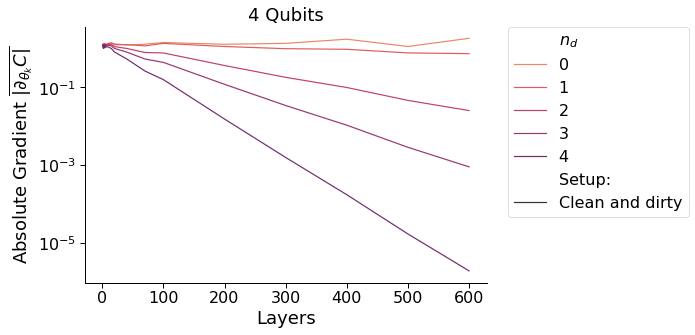

In [78]:
### Plotting realistic noise model
for qubit_no in [4]:
    realstic_full = facet_plot(
        df_real.query(f' qubits=={qubit_no}'),
        "Layers",
        "Absolute Gradient",
        r"$n_d$",
        "Setup:",
        "qubits",
        col_wrap=1,
        estimator=np.mean
    )
    realstic_full._legend.remove()
    realstic_full.set(yscale="log",ylabel = r"Absolute Gradient $\overline{\left |\partial_{\theta_k} C\right |}$", title = f"{qubit_no} Qubits")
    L = realstic_full.axes[0].legend()
    L.get_texts()[0].set_text(r'$n_d$')
    L.get_texts()[qubit_no+2].set_text('Setup:')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    realstic_full.savefig(f'./plots/CombindedReal{qubit_no}.svg')
    plt.close('all')# this line can be commented to show plots inline

    
for qubit_no in [4,6,8]:
    realstic_full = facet_plot(
        df_real.query(f' qubits=={qubit_no}'),
        "Total Error",
        "Absolute Gradient",
        r"$n_d$",
        "Setup:",
        "qubits",
        col_wrap=1,
        estimator=np.mean
    )
    realstic_full._legend.remove()
    realstic_full.set(yscale="log",ylabel = r"Absolute Gradient $\overline{\left |\partial_{\theta_k} C\right |}$", title = f"{qubit_no} Qubits")
    L = realstic_full.axes[0].legend(loc='lower left')
    L.get_texts()[0].set_text(r'$n_d$')
    L.get_texts()[qubit_no+2].set_text('Setup:')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    realstic_full.savefig(f'./plots/ScaledErrCombindedReal{qubit_no}.svg')
    plt.close('all')# this line can be commented to show plots inline
